# Clustering - Practical

Follow the instructions to complete each of these tasks. This set of exercises focuses on implementing clustering in a given dataset.

You will need to download a dataset and place them in the same folder as this notebook. Run the cell below to load all of the necessary Python modules and libraries.

### Clustering 

#### Dataset: Faithfull dataset 

Observations of the ‘Old faithful’ geyser in Yellowstone National Park. 
 - Measurements of eruption time and waiting time since the previous eruption
Source: Data taken from R statistical environment, Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics, 39, 357–365. 



1. Perform the exploratory analysis of the data:
    - How many variables?
    - Characteristics of the variables?
    - How many rows?
    - How is the distribution of the variables (graph)? 
    - Document your findings.
    
__Note:__ Seaborn can be useful to generate graphs to analyse the relationship between the variables. 

2. Clustering analysis:
    - Apply the clustering algorithms K-means and GMM to the data set under the following conditions:
        - 2, 3 and 4 clusters
        - Visualise the behaviour of the different clusters sets (you can use the functions defined in the Clustering Session). 

    - Identify the ideal number of cluster selection for K-means and GMM. Create a graph of each ideal cluster number set up for K-means and GMM. 
    - Normalise the data and analyse the impact.
    - Compare and contrast.
    
Reference: https://www.kaggle.com/datasets/janithwanni/old-faithful

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## Exploring the data

In [2]:
df = pd.read_csv('faithful.csv')

In [3]:
# 272 rows x 2 columns
# no null values in any of the columns
# eruptions: float, waiting:integer
df.isnull().sum()
df.dtypes
df.head()
df.tail()

eruptions  waiting
268      4.117       81
269      2.150       46
270      4.417       90
271      1.817       46
272      4.467       74

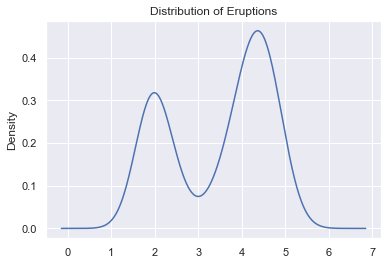

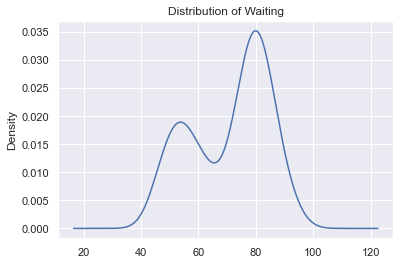

In [4]:
df['eruptions'].plot(kind='kde')
plt.title('Distribution of Eruptions')
plt.show()
df['waiting'].plot(kind='kde')
plt.title('Distribution of Waiting')
plt.show()
# Eruptions: two peaks around 2 and 4.5 
# Waiting: two peaks around 52 and 80 

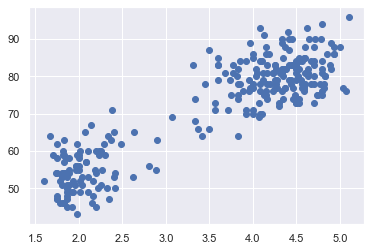

In [5]:
plt.plot(df['eruptions'], df['waiting'], 'o')

## Analysis

In [6]:
from scipy.spatial.distance import cdist
##Creating a method to visualise the centroids area of influence
def plot_kmeans(kmeans, X, n_clusters, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

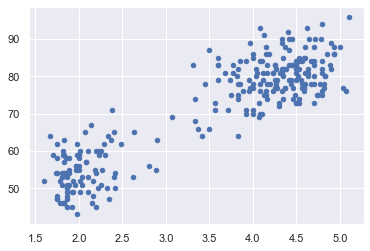

In [7]:
#plot_kmeans(kmeans, X, n_clusters, rseed=0, ax=None)
# X is gonna be the array of data
# prepare X now:
X = df.values
# visualise the first 10 data
X[0:10]

# There are 2 clusters without performing much analysis
#X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:, 0], X[:, 1], s=20) # s is the size of the balls

## Kmean 

In [8]:
##Creating a method to visualise the centroids area of influence
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

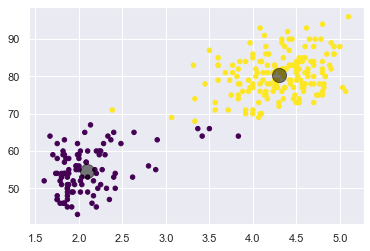

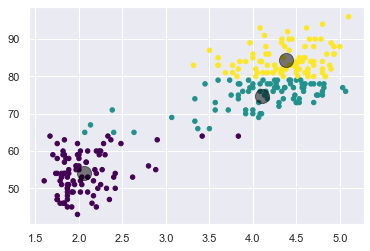

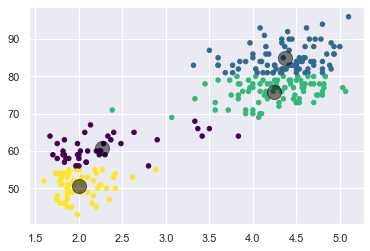

In [9]:
#Plotting the graphs for n-cluster = 2,3,4
for clusters in range(2,5):
    #Creating the deffinition of the model
    kmeans = KMeans(n_clusters=clusters)

    #Training the model to a particular dataset
    kmeans.fit(X)

    #Assigning the "labels" with the model defined and trained before
    y_kmeans = kmeans.predict(X)
    
    ##Centroids coordenates 
    kmeans.cluster_centers_
    centers = kmeans.cluster_centers_
    
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    #plt.show()
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    #plot_kmeans(kmeans, X)
    #plt.title(f'n-cluster:{clusters}')
    plt.show()

## Kmeans optimal cluster elbow and sillohoute score method

In [49]:
def elbow(X):
    ## Store the inertia metric value given different Ks and display the output:
    inertia = []
    #Range of the different values of K to analyse
    K = range(1,6)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        inertia.append(km.inertia_)
    
    ##Printing the inertia values for each K
    
    ##Ploting the inertias for each K value: 
    plt.plot(K, inertia)
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return inertia

In [50]:
def Silhouette_Scores(X):
    ## List to store the metric value given different K values
    s_score = []
    #Range of the different values of K to analyse
    K = range(2,5)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        s_score.append(silhouette_score(X, kmeans.labels_))
    ##Plotting the values of the metric
    plt.plot(K, s_score)
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Analysis')
    plt.show()
    return s_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


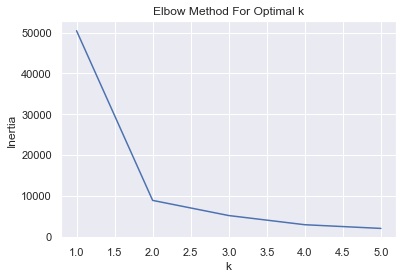

[50440.15702526103,
 8901.76872094721,
 5188.540468232618,
 2941.7209033137615,
 2036.834763763709]

In [51]:
elbow(X)

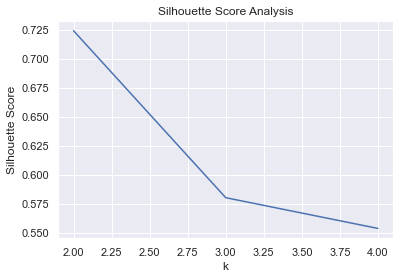

[0.724054851995858, 0.5803618842550007, 0.553916636789305]

In [52]:
Silhouette_Scores(X)
#k=2 or 3

## GMM

In [53]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [54]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [55]:
def gmm(n_comp,X):
    ##Creating the GMM model with 4 components
    gmm = GMM(n_components=n_comp, random_state=42).fit(X)
    ##Lets assign a label to the dataset created
    labels = gmm.predict(X)
    labels
    ## Probability of each point
    probs = gmm.predict_proba(X)
    probs[:5].round(3)
    
    ##Ploting the clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=20, cmap='viridis');
    plt.title(f'Plotting the clusters:{n_comp}')
    #plot_gmm(gmm, X)
    #plt.show()
    return gmm

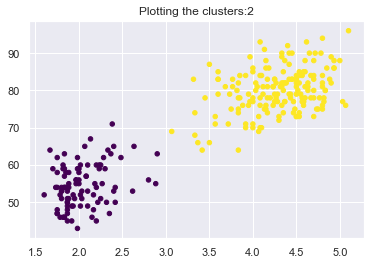

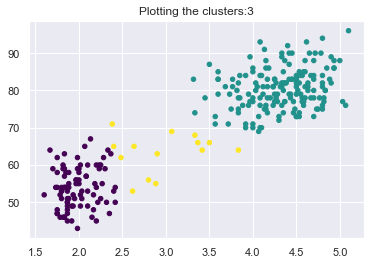

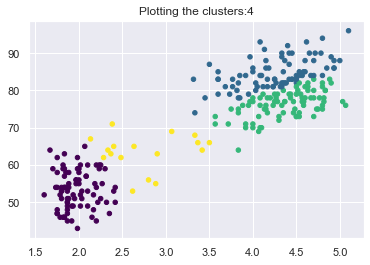

In [56]:
for ncomp in range(2,5):
    #plot_gmm(gmm(ncomp,X), X)
    gmm(ncomp,X)
    plt.show()
    ##Training a GMM model with 4 components
    #plt.title(f'Plotting the clusters and the areas of influence for n-compomenets:{ncomp}')
    #plt.show()

## GMM optimal k

In [68]:
def AIC_BIC(X):
    ##Create the following graph that compares BIC and AIC for 2 to 10 components:
    ###Hints: 
    ###You can store the different models in a list and then extract the indexes values. 
    ###You can also explore list comprehensions.
    n_components = range(2, 5)

    models = [GMM(n, covariance_type='full', random_state=0).fit(X)
             for n in n_components]

    plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
    plt.xlabel('n_components')
    plt.legend()
    
    

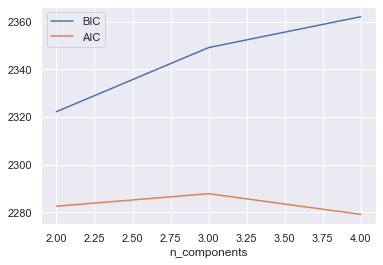

In [69]:
AIC_BIC(X)
#k = 2 or 4

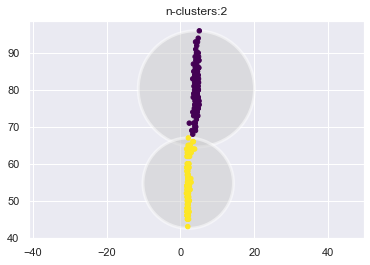

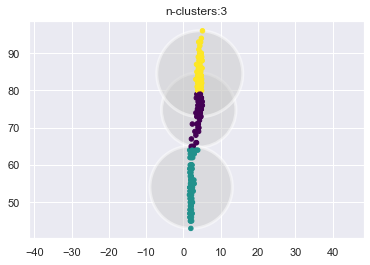

In [59]:
#Plotting the graphs for n-cluster = 2,3,4
for clusters in range(2,4):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(X)
    kmeans.cluster_centers_
    centers = kmeans.cluster_centers_
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    plot_kmeans(kmeans, X)
    #plot_kmeans(kmeans, X)
    plt.title(f'n-clusters:{clusters}')
    plt.show()

##  graphs for k = 2 and k = 4 from GMM

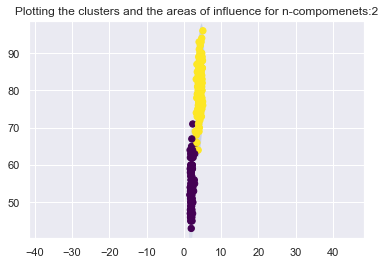

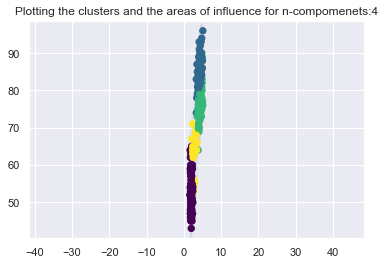

In [60]:
for ncomps in range(2,5,2):
    plot_gmm(gmm(ncomps,X), X)
    plt.title(f'Plotting the clusters and the areas of influence for n-compomenets:{ncomps}')
    plt.show()

## Normalising the data

In [61]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X_stretched = scale_X.fit_transform(X)

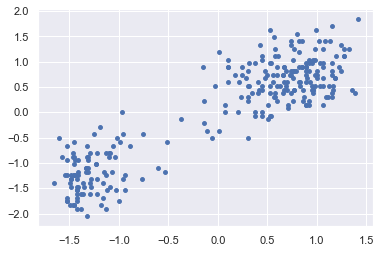

In [62]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=15)

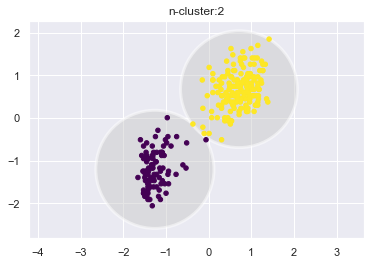

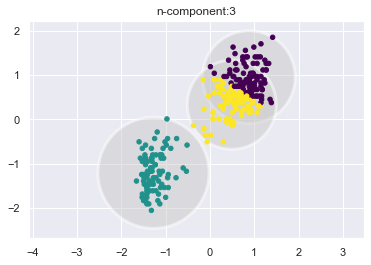

In [63]:
kmeans = KMeans(n_clusters=2, random_state=42)
##Visualising the clusters and area of influence:
plot_kmeans(kmeans, X_stretched)
plt.title(f'n-cluster:{2}')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
##Visualising the clusters and area of influence:
plot_kmeans(kmeans, X_stretched)
plt.title(f'n-component:{3}')
plt.show()

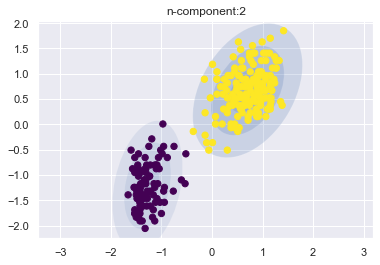

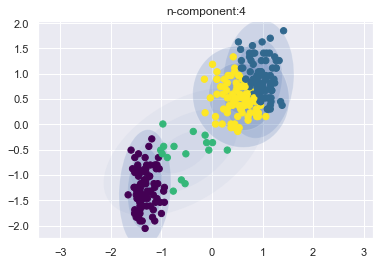

In [64]:
##Training a GMM model with 4 components
gmm = GMM(n_components=2,  random_state=42)
##Visualising the clusters and area of influence:
plot_gmm(gmm, X_stretched)
plt.title(f'n-component:{2}')
plt.show()

gmm = GMM(n_components=4,  random_state=42)
##Visualising the clusters and area of influence:
plot_gmm(gmm, X_stretched)
plt.title(f'n-component:{4}')
plt.show()

### Kmeans evaluation with normalised data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


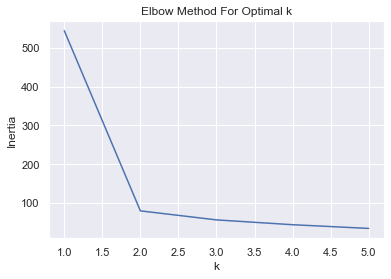

[544.0000000000001,
 79.57595948827701,
 56.313617740362595,
 43.87095928963708,
 34.32512005495579]

In [65]:
elbow(X_stretched)

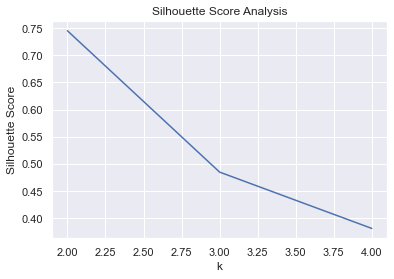

[0.7451774401188772, 0.4850815668329722, 0.3814586145744695]

In [67]:
Silhouette_Scores(X_stretched)

### GMM evaluation

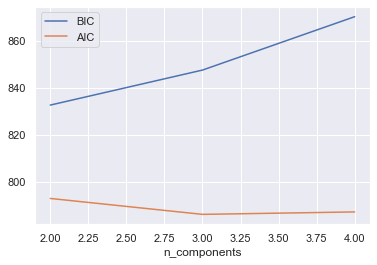

In [70]:
AIC_BIC(X_stretched)

### Compare and contrast
#### Before Normalisation
- Kmeans: Both elbow and sillouhet method shows k=2.
- GMM: The AIC is smallest for k = 4 whereas BIC is smallest for k = 2.
- Kmeans show the cluster has a bigger area of influnce compared to GMM method. The area of influence for GMM is significantly smaller.

#### After Normalisation
- Normalising the data does not impact the outputs from Kmeans but for GMM evaluation method the AIC and BIC values for all k becomes smaller.
- The area of influence from GMM becomes more significant after normalising the data.
